In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [2]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

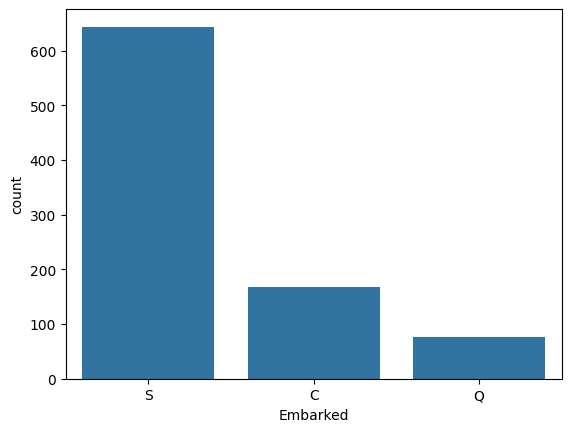

In [18]:
sns.countplot(data=train, x = "Embarked")
plt.show()


In [6]:
train["Embarked"] = train["Embarked"].fillna("S")
train[train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


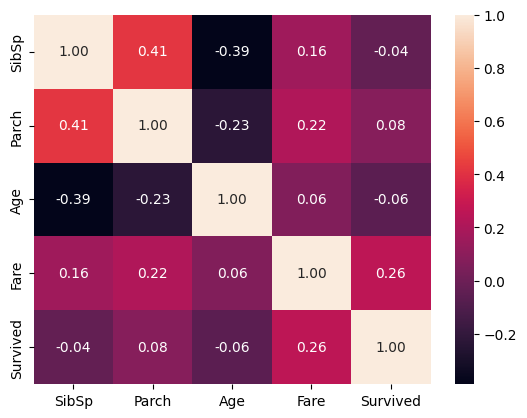

In [62]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train[list1].corr(), annot=True, fmt=".2f")
plt.show()

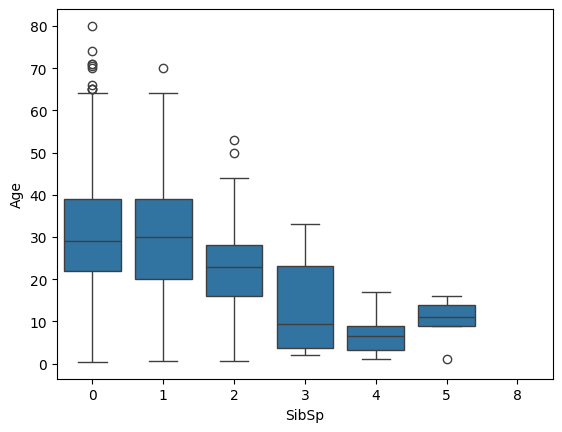

In [34]:
sns.boxplot(x="SibSp", y="Age", data=train)
plt.show()


In [7]:
datas = [train, test]

for idx, df in enumerate (datas):
    X_train = df.loc[df["Age"].notna(), ["Age", "SibSp", "Parch"]]
    X_test  = df.loc[df["Age"].isna(), ["Age", "SibSp", "Parch"]]

    y_train = X_train["Age"]
    X_train = X_train.drop("Age", axis=1)
    X_test  = X_test.drop("Age", axis=1)

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    preds = reg.predict(X_test)

    datas[idx].loc[datas[idx]["Age"].isna(), "Age"] = preds


In [8]:
train = train.drop("Cabin", axis=1)
test = test.drop("Cabin", axis=1)

In [9]:
test[test["Fare"].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


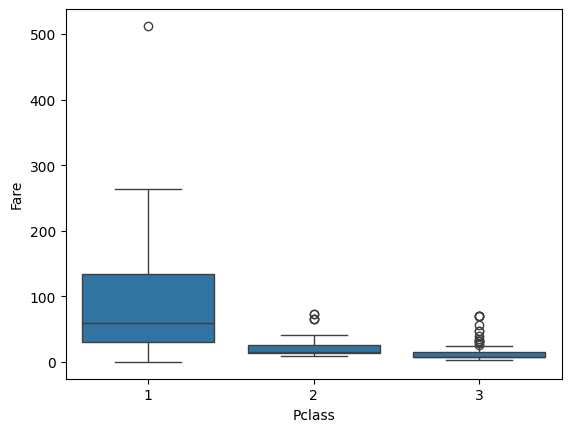

In [83]:
sns.boxplot(x="Pclass", y="Fare", data=test)
plt.show()

In [10]:
med_pclass3 = test.loc[test["Pclass"] == 3, "Fare"].mean()
med_pclass3 
test["Fare"] = test["Fare"].fillna(med_pclass3)

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
train["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [12]:
data = [train, test]
for idx in range(len(data)):
    tickets =[]
    for i in list(data[idx].Ticket):
        if not i.isdigit():
            tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
        else:
            tickets.append("x")
    data[idx]["Ticket"] = tickets

In [13]:
for df in data:
    df['Ticket_code'] = df['Ticket'].apply(lambda t: False if t == 'x' else True)


In [14]:
train_ticket_values = set(train['Ticket'].unique())
test_ticket_values  = set(test['Ticket'].unique())

test['Ticket'] = test['Ticket'].apply(lambda t: t if t in train_ticket_values else 'x')

In [18]:
test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_code
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,x,7.8292,Q,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,x,7.0000,S,False
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,x,9.6875,Q,False
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,x,8.6625,S,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,x,12.2875,S,False
5,897,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,x,9.2250,S,False
6,898,3,"Connolly, Miss. Kate",female,30.000000,0,0,x,7.6292,Q,False
7,899,2,"Caldwell, Mr. Albert Francis",male,26.000000,1,1,x,29.0000,S,False
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.000000,0,0,x,7.2292,C,False
9,901,3,"Davies, Mr. John Samuel",male,21.000000,2,0,A4,24.1500,S,True


In [15]:
name = train["Name"]
train["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]
train["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [16]:
name = test["Name"]
test["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]
test["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

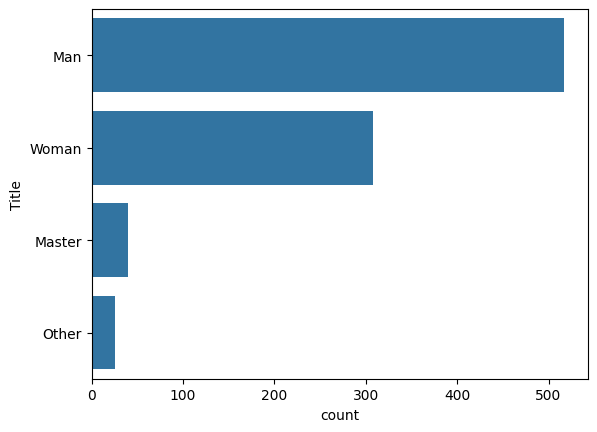

In [110]:
sns.countplot(train["Title"])
plt.show()

In [17]:
def categorize_title(title):
    if title in ["Mrs", "Ms", "Miss"]:
        return "Woman"
    elif title == "Mr":
        return "Man"
    elif title == "Master":
        return "Master"
    else:
        return "Other"

train["Title"] = train["Title"].apply(categorize_title)
test["Title"] = test["Title"].apply(categorize_title)


In [18]:
train = train.drop("Name", axis=1)
test = test.drop("Name", axis=1)

In [19]:
train["fsize"] = train["Parch"] + train["SibSp"] + 1
test["fsize"] = test["Parch"] + test["SibSp"] + 1

train["fsize"]

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: fsize, Length: 891, dtype: int64

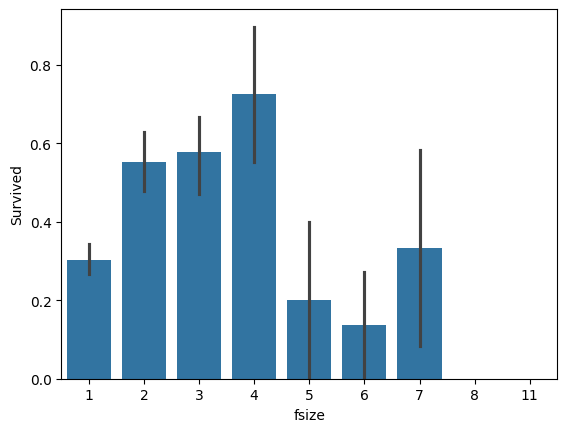

In [115]:
sns.barplot(x="fsize", y="Survived", data=train)
plt.show()

In [20]:
train["fam_size"] = [1 if i < 5
                     else 0 for i in train["fsize"] ]
test["fam_size"] = [1 if i < 5
                     else 0 for i in test["fsize"] ]

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Ticket_code  891 non-null    bool   
 11  Title        891 non-null    object 
 12  fsize        891 non-null    int64  
 13  fam_size     891 non-null    int64  
dtypes: bool(1), float64(2), int64(7), object(4)
memory usage: 91.5+ KB


In [22]:
train = pd.get_dummies(train, columns=["Pclass", "Sex", "Ticket", "Embarked", "Title", "fam_size"])
test = pd.get_dummies(test, columns=["Pclass", "Sex", "Ticket", "Embarked", "Title", "fam_size"])


In [23]:
train = train.drop("fsize", axis=1)
test = test.drop("fsize", axis=1)

In [24]:
train_cols = set(train.columns)
test_cols  = set(test.columns)

only_in_train = train_cols - test_cols

common_cols = train_cols & test_cols

print(only_in_train)
print(common_cols)


{'Ticket_Fa', 'Ticket_CASOTON', 'Ticket_SOP', 'Survived', 'Ticket_SP', 'Ticket_SCOW', 'Ticket_LINE', 'Ticket_SWPP', 'Ticket_AS', 'Ticket_PPP'}
{'Title_Man', 'Title_Other', 'Embarked_Q', 'Ticket_SOC', 'Ticket_WEP', 'SibSp', 'Pclass_2', 'Ticket_SOTONO2', 'PassengerId', 'Ticket_SCParis', 'Title_Woman', 'Sex_male', 'Sex_female', 'Embarked_C', 'Pclass_3', 'Age', 'Ticket_PC', 'Ticket_SOPP', 'fam_size_0', 'Ticket_SC', 'Ticket_SCPARIS', 'Ticket_WC', 'Ticket_A5', 'Embarked_S', 'Ticket_SCAH', 'Ticket_SCA4', 'Ticket_FCC', 'Title_Master', 'Ticket_A4', 'Ticket_CA', 'Pclass_1', 'Ticket_PP', 'Ticket_STONO2', 'Fare', 'Ticket_C', 'Ticket_x', 'Ticket_SOTONOQ', 'Ticket_FC', 'Ticket_code', 'fam_size_1', 'Ticket_STONO', 'Parch'}


In [ ]:
missing_cols = ['Ticket_SCOW', 'Ticket_AS', 'Ticket_SOP', 'Ticket_SP', 
                'Ticket_PPP', 'Ticket_CASOTON', 'Ticket_LINE', 
                'Ticket_SWPP', 'Ticket_Fa']

test= test.reindex(columns=test.columns.tolist() + missing_cols, fill_value=False)

test[missing_cols].head()


,Ticket_SCOW,Ticket_AS,Ticket_SOP,Ticket_SP,Survived,Ticket_PPP,Ticket_CASOTON,Ticket_LINE,Ticket_SWPP,Ticket_Fa
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [ ]:
y_train = train["Survived"]
X_train = train.drop(["Survived", "PassengerId"], axis=1)

X_test = test.drop("PassengerId", axis=1)
X_test = X_test[X_train.columns]


# models

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)

acc = accuracy_score(y_train, y_pred)
acc


0.9887766554433222

In [ ]:
pred_df = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })
pred_df.to_csv("log_reg_predictions.csv", index=False)